In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler ,Normalizer ,MinMaxScaler ,LabelEncoder
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [2]:
df = pd.read_csv('WineQT.csv')
df.set_index('Id', inplace=True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                              
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                          
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality  
Id                      
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  

[1143 rows x 12 columns]

## quality under 5<= (bad)(0)
## quality over 5> (good)(1)


In [3]:
df['quality'] = (df['quality'] > 5).astype(int)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                              
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                          
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality  
Id                      
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1592     11.0        1  
1593      9.5        1  
1594     10.5        0  
1595     11.2        1  
1597     10.2        0  

[1143 rows x 12 columns]

In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
class Visualization():


    def __init__(self, x, y):
        self.x = x
        self.y = y

    def feature_distributions(self):
        self.hist(figsize=(15, 12), bins=20, edgecolor='black')
        plt.suptitle('Feature Distributions', fontsize=16)
        plt.show()

    def target(y):
        quality_counts = y.value_counts()
        plt.figure(figsize=(8, 8))
        plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(quality_counts))))
        plt.title(f'Distribution of {y.name} Ratings')
        plt.show()

    def correlation_matrix(self):
        plt.figure(figsize=(12, 10))
        corr_matrix = self.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix')
        plt.show()

    def pair_plot(self, y):
        sns.pairplot(self, hue=y.name, palette='viridis')
        plt.suptitle(f'Pair Plot of {y.name} Dataset', y=1.02)
        plt.show()

    def box_plot(self, y):
        features = self.columns
        for feature in features:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=y.name, y=feature, data=self, palette='viridis')
            plt.title(f'Box Plot of {feature} by {y.name}')
            plt.xlabel(f'{y.name}')
            plt.ylabel(feature)
            plt.xticks(rotation=45)  
            plt.grid(True)  
            plt.show()

    def line_plot(self, y):
        for column in self.columns:
            plt.figure(figsize=(10, 6))
            sns.lineplot(x=y, y=self[column], marker='o', linestyle='-', color='b')
            plt.xlabel(f'{y.name}')
            plt.ylabel(column)
            plt.title(f'Line Plot of {column} with respect to {y.name}')
            plt.grid(True)
            plt.show()




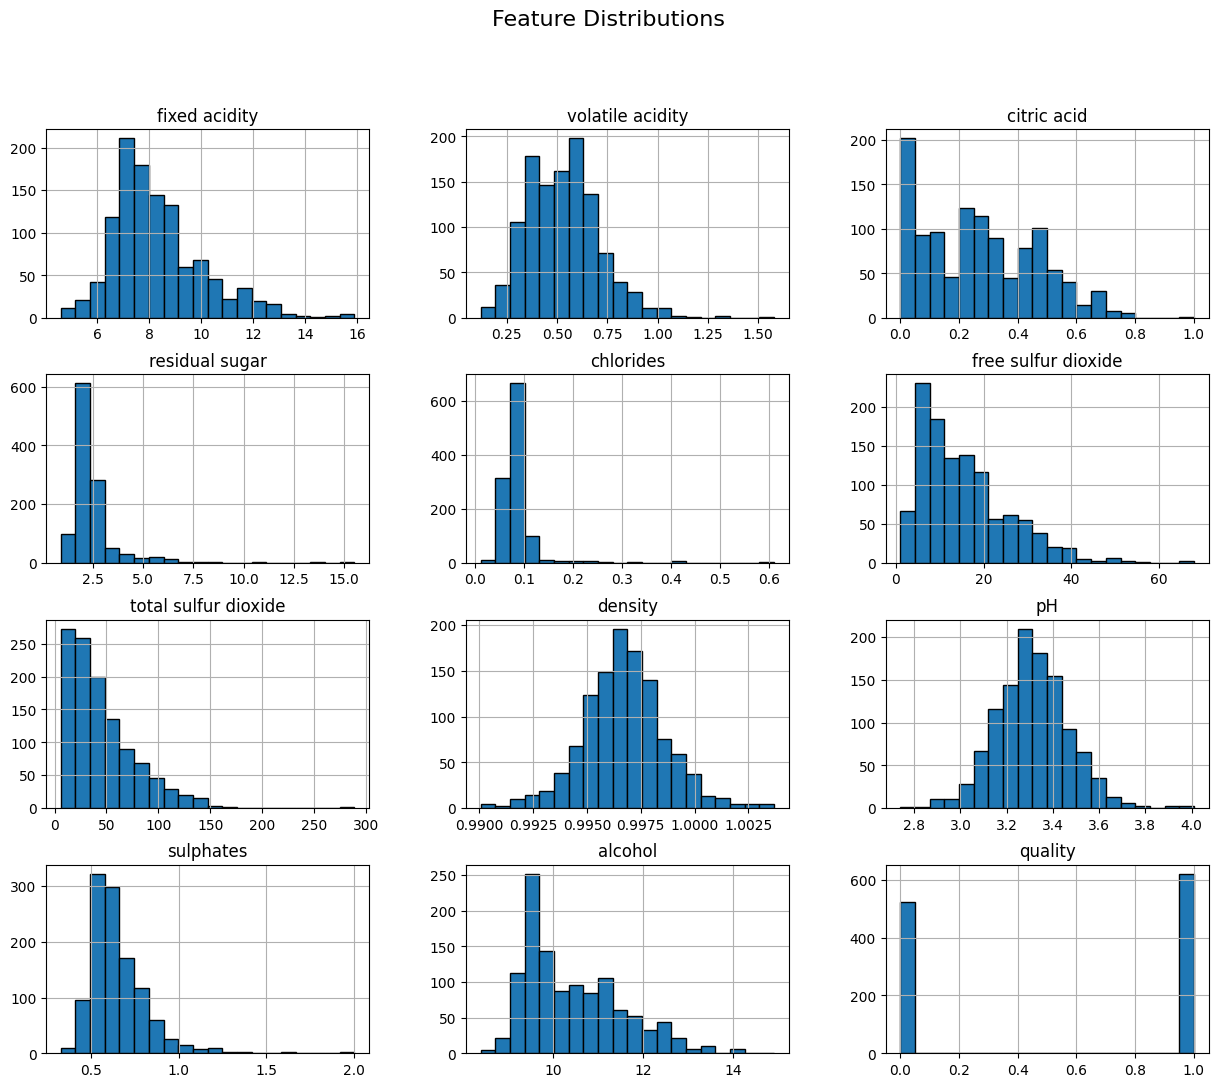

In [19]:
Visualization.feature_distributions(df)

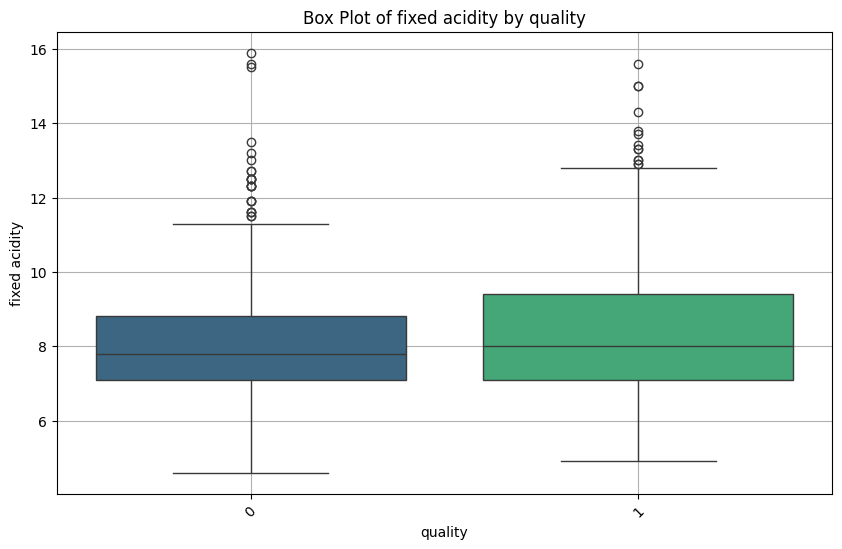

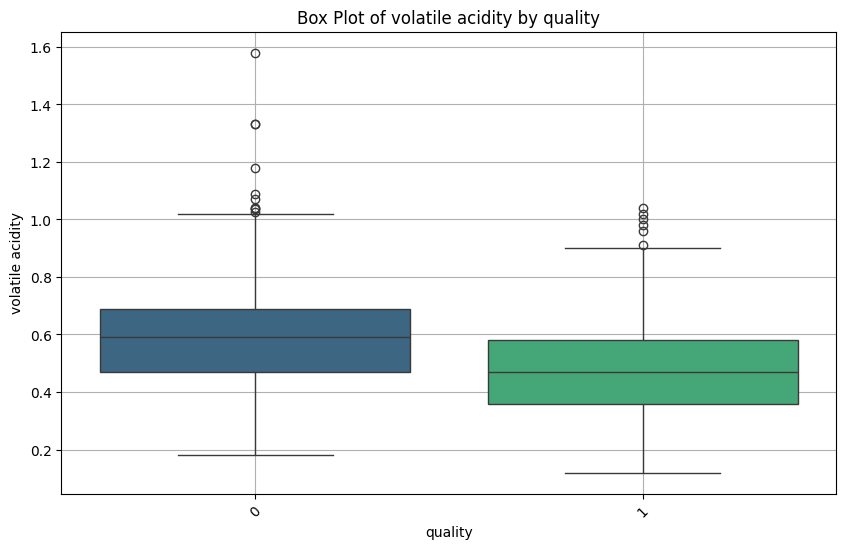

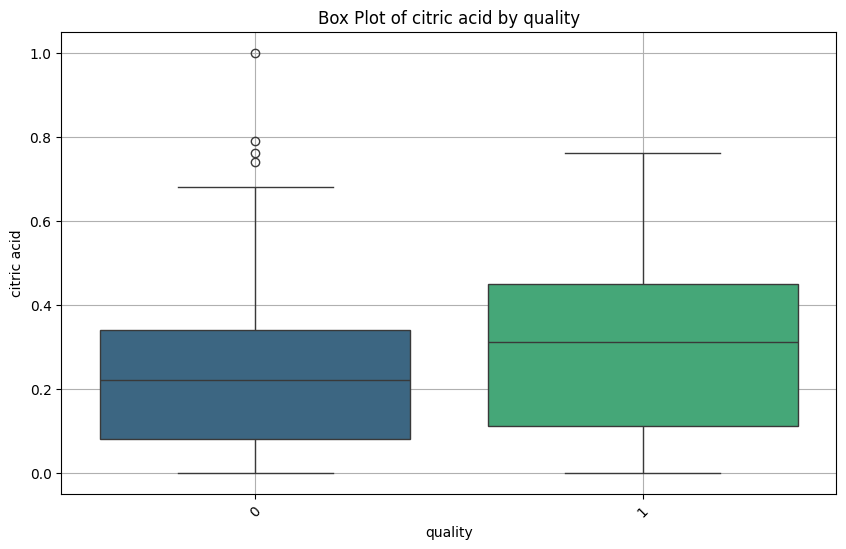

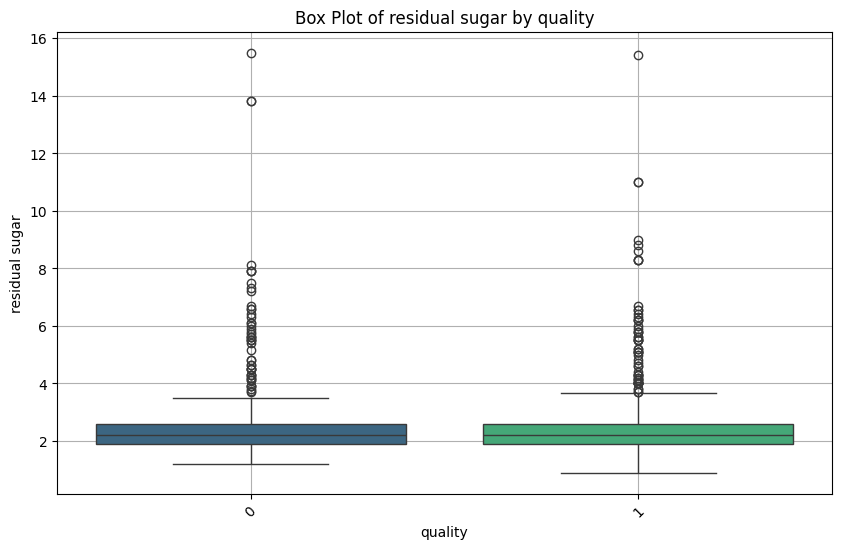

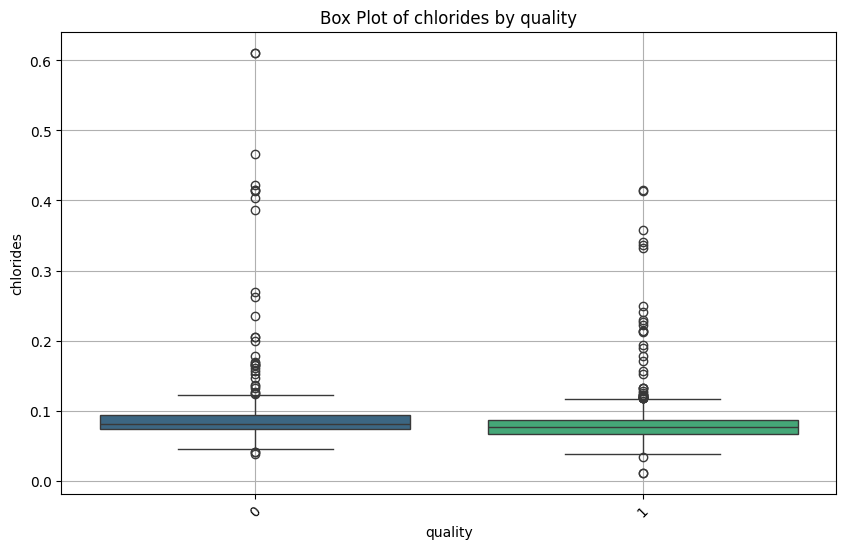

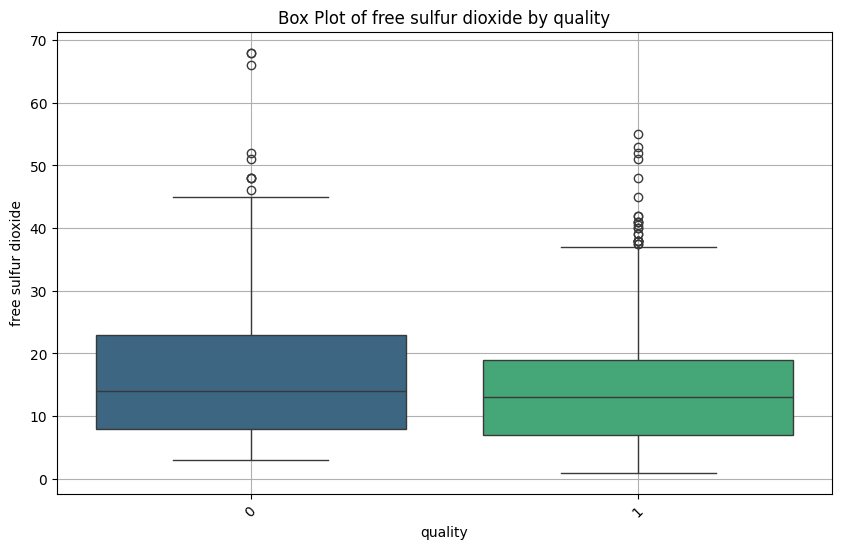

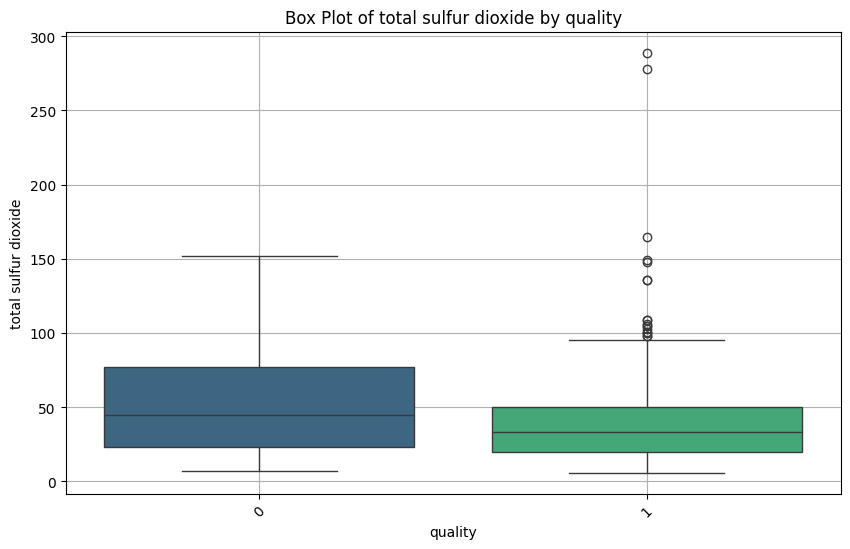

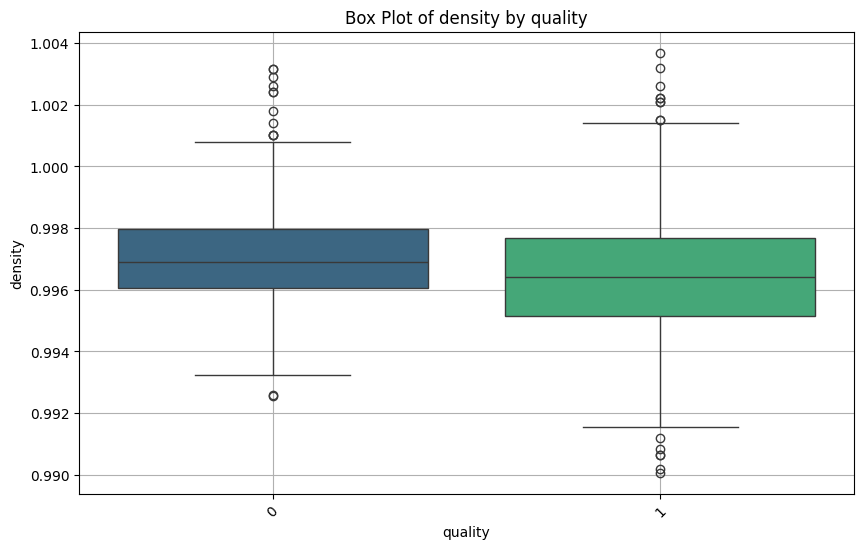

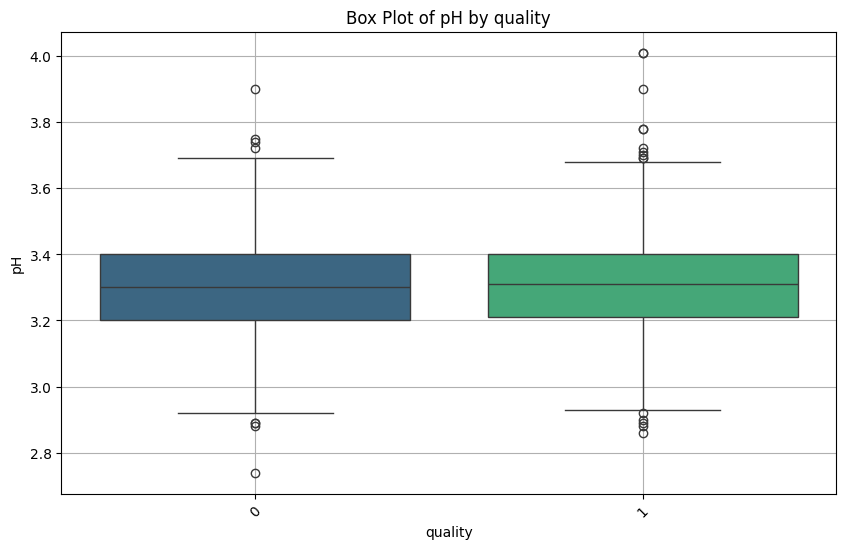

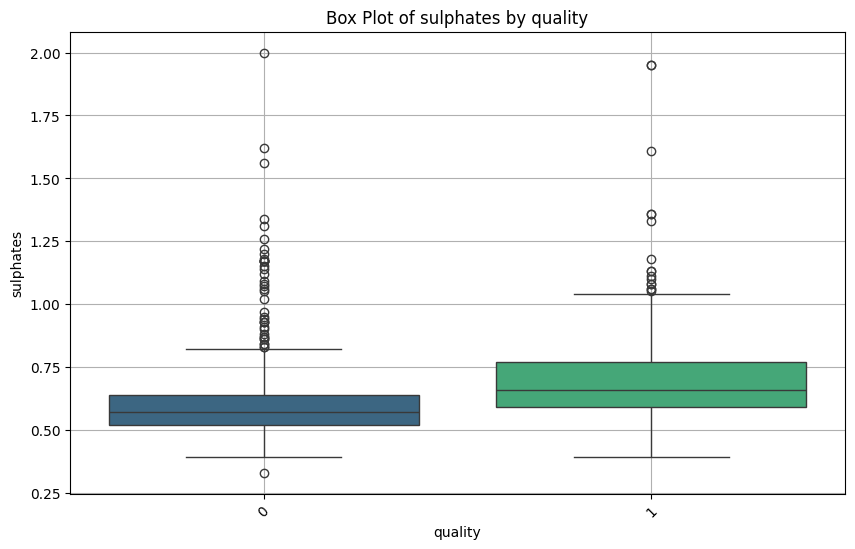

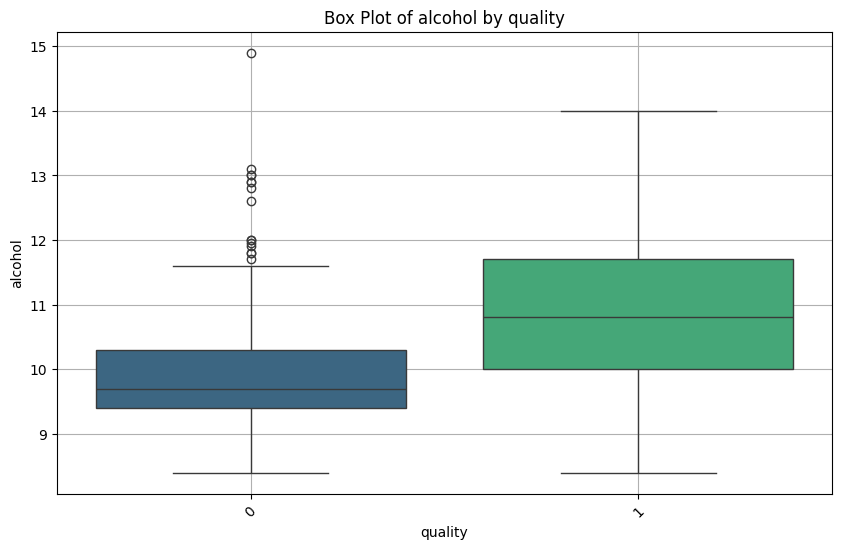

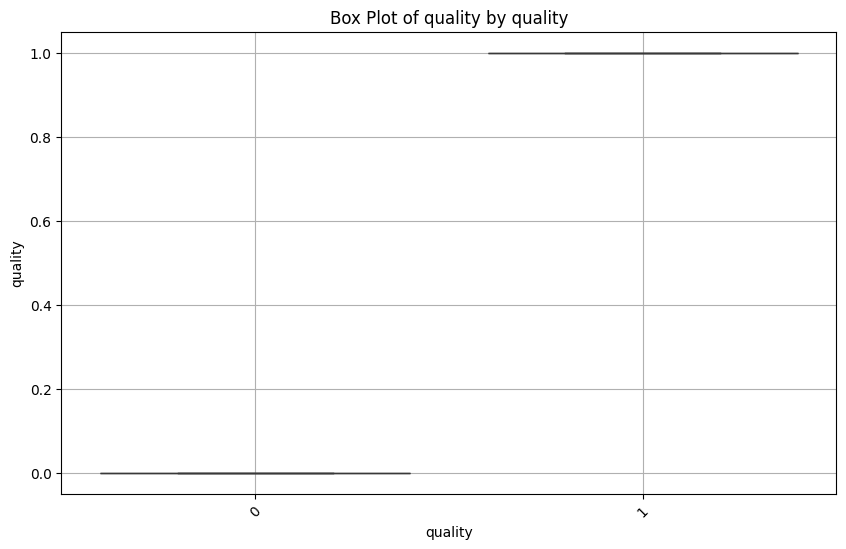

In [20]:
Visualization.box_plot(df, y)

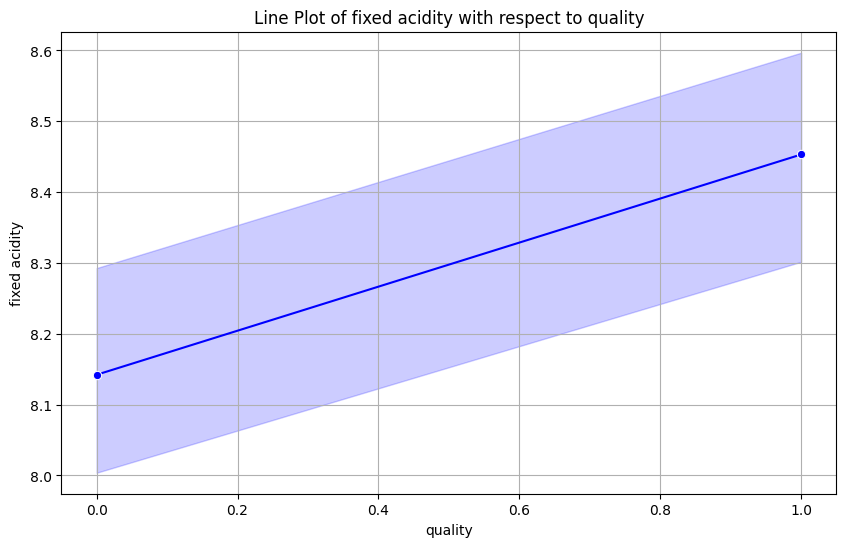

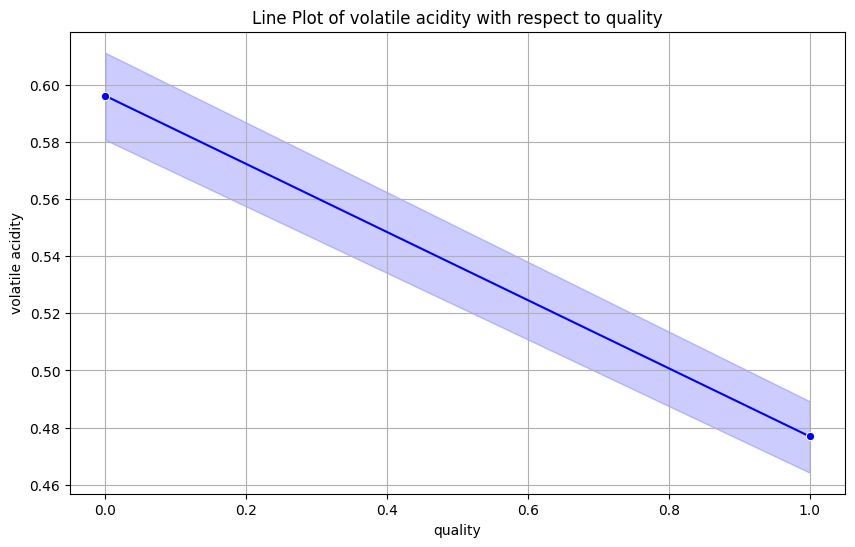

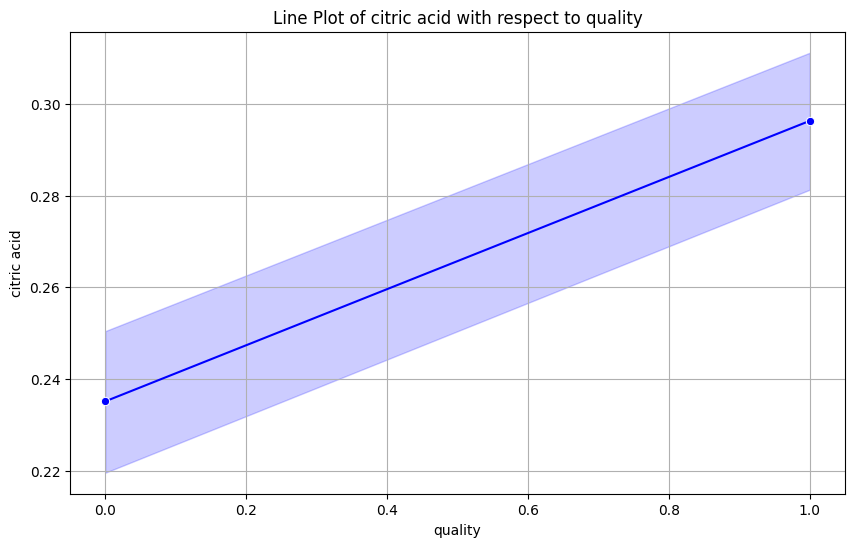

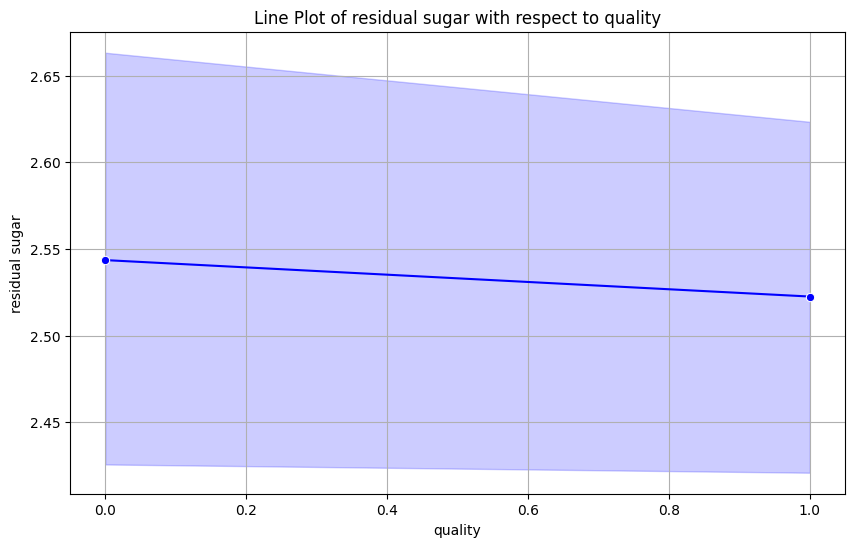

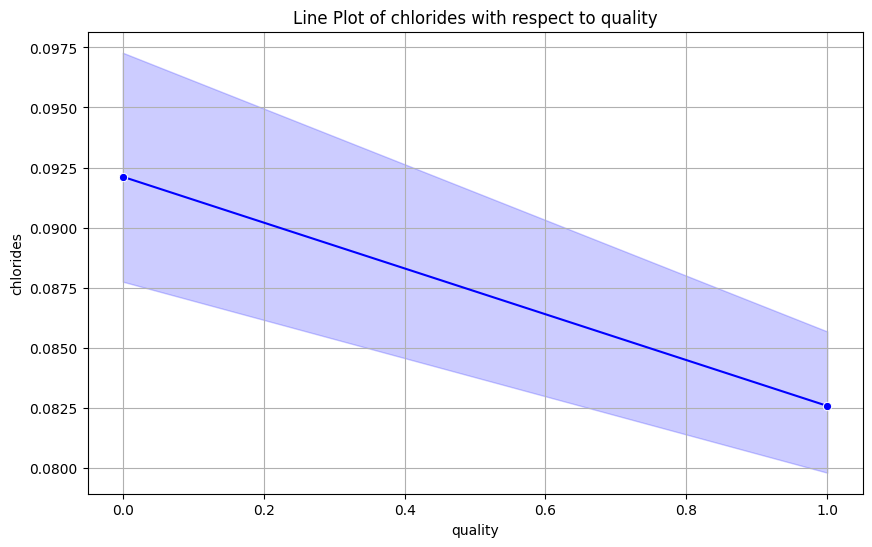

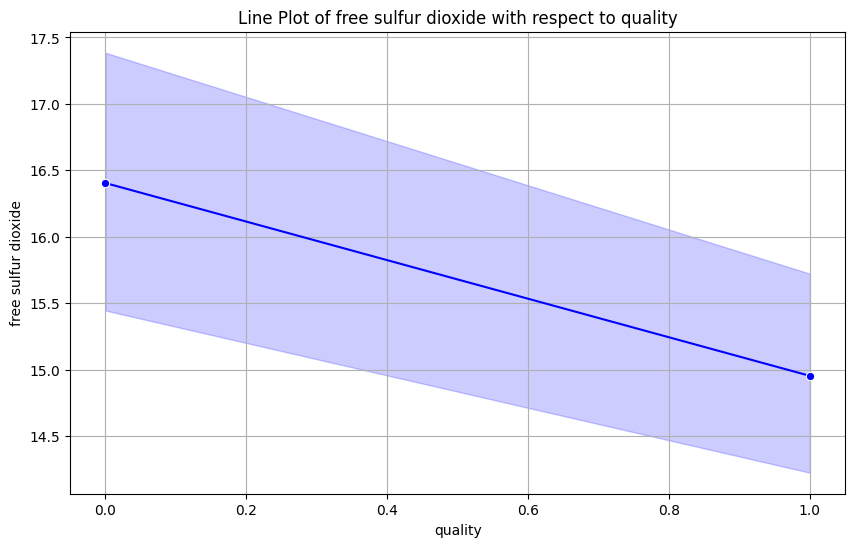

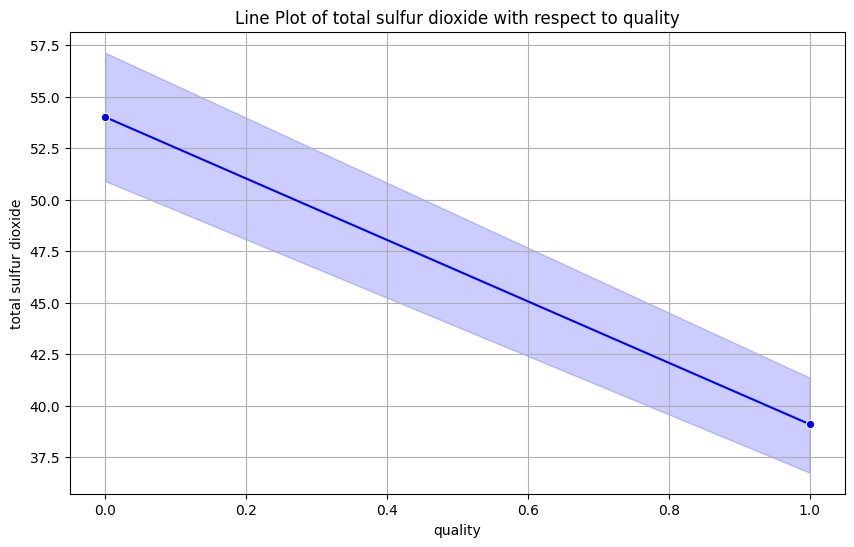

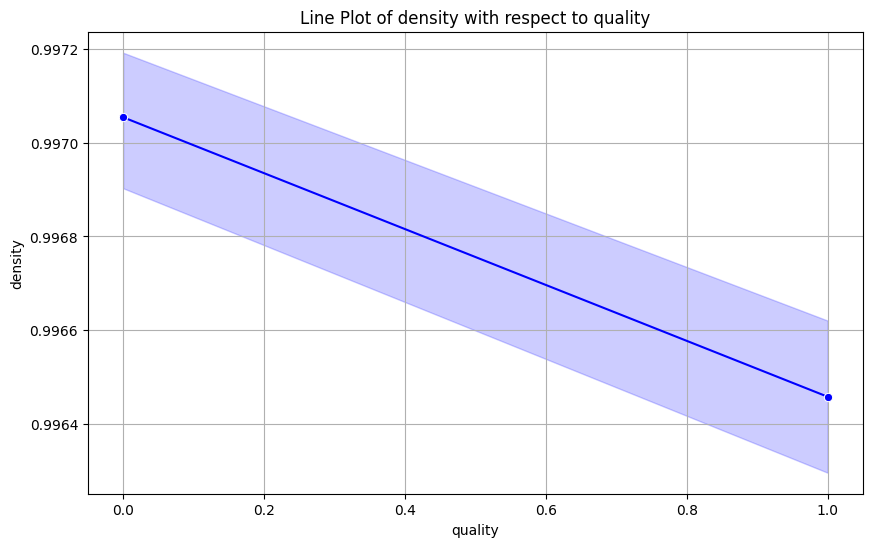

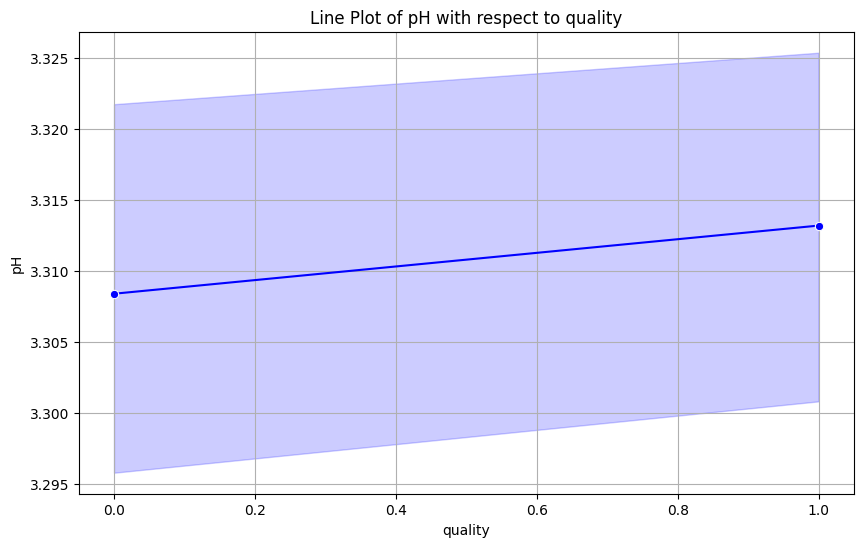

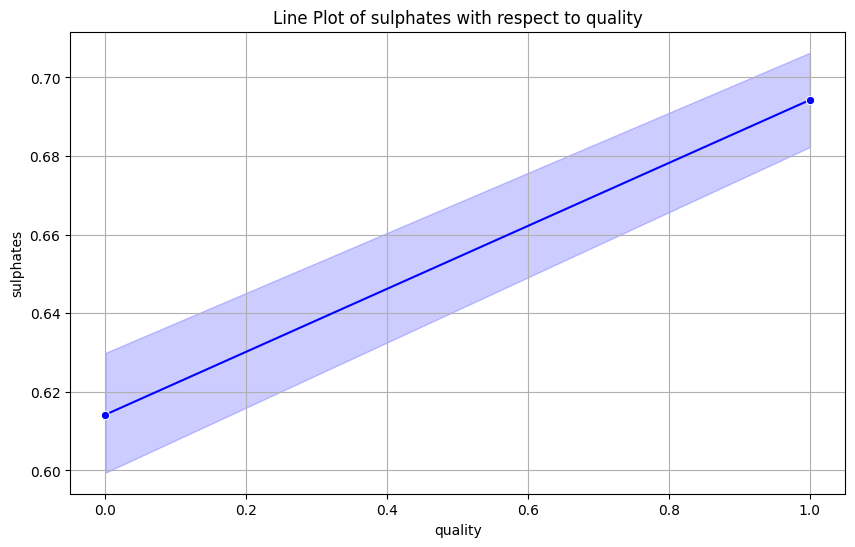

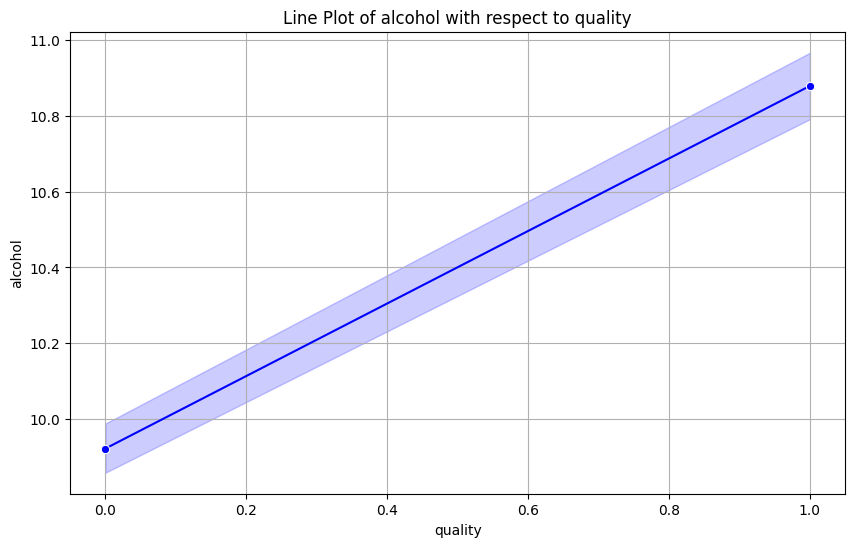

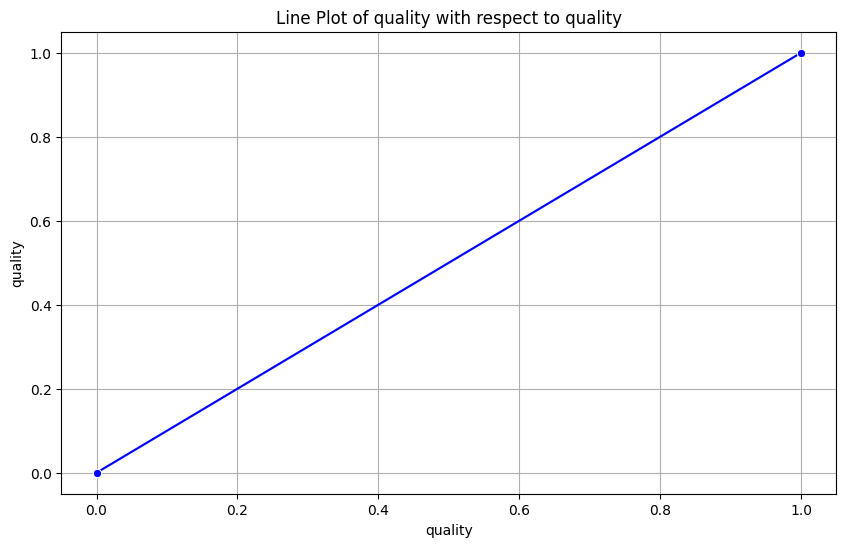

In [27]:
Visualization.line_plot(df, y)

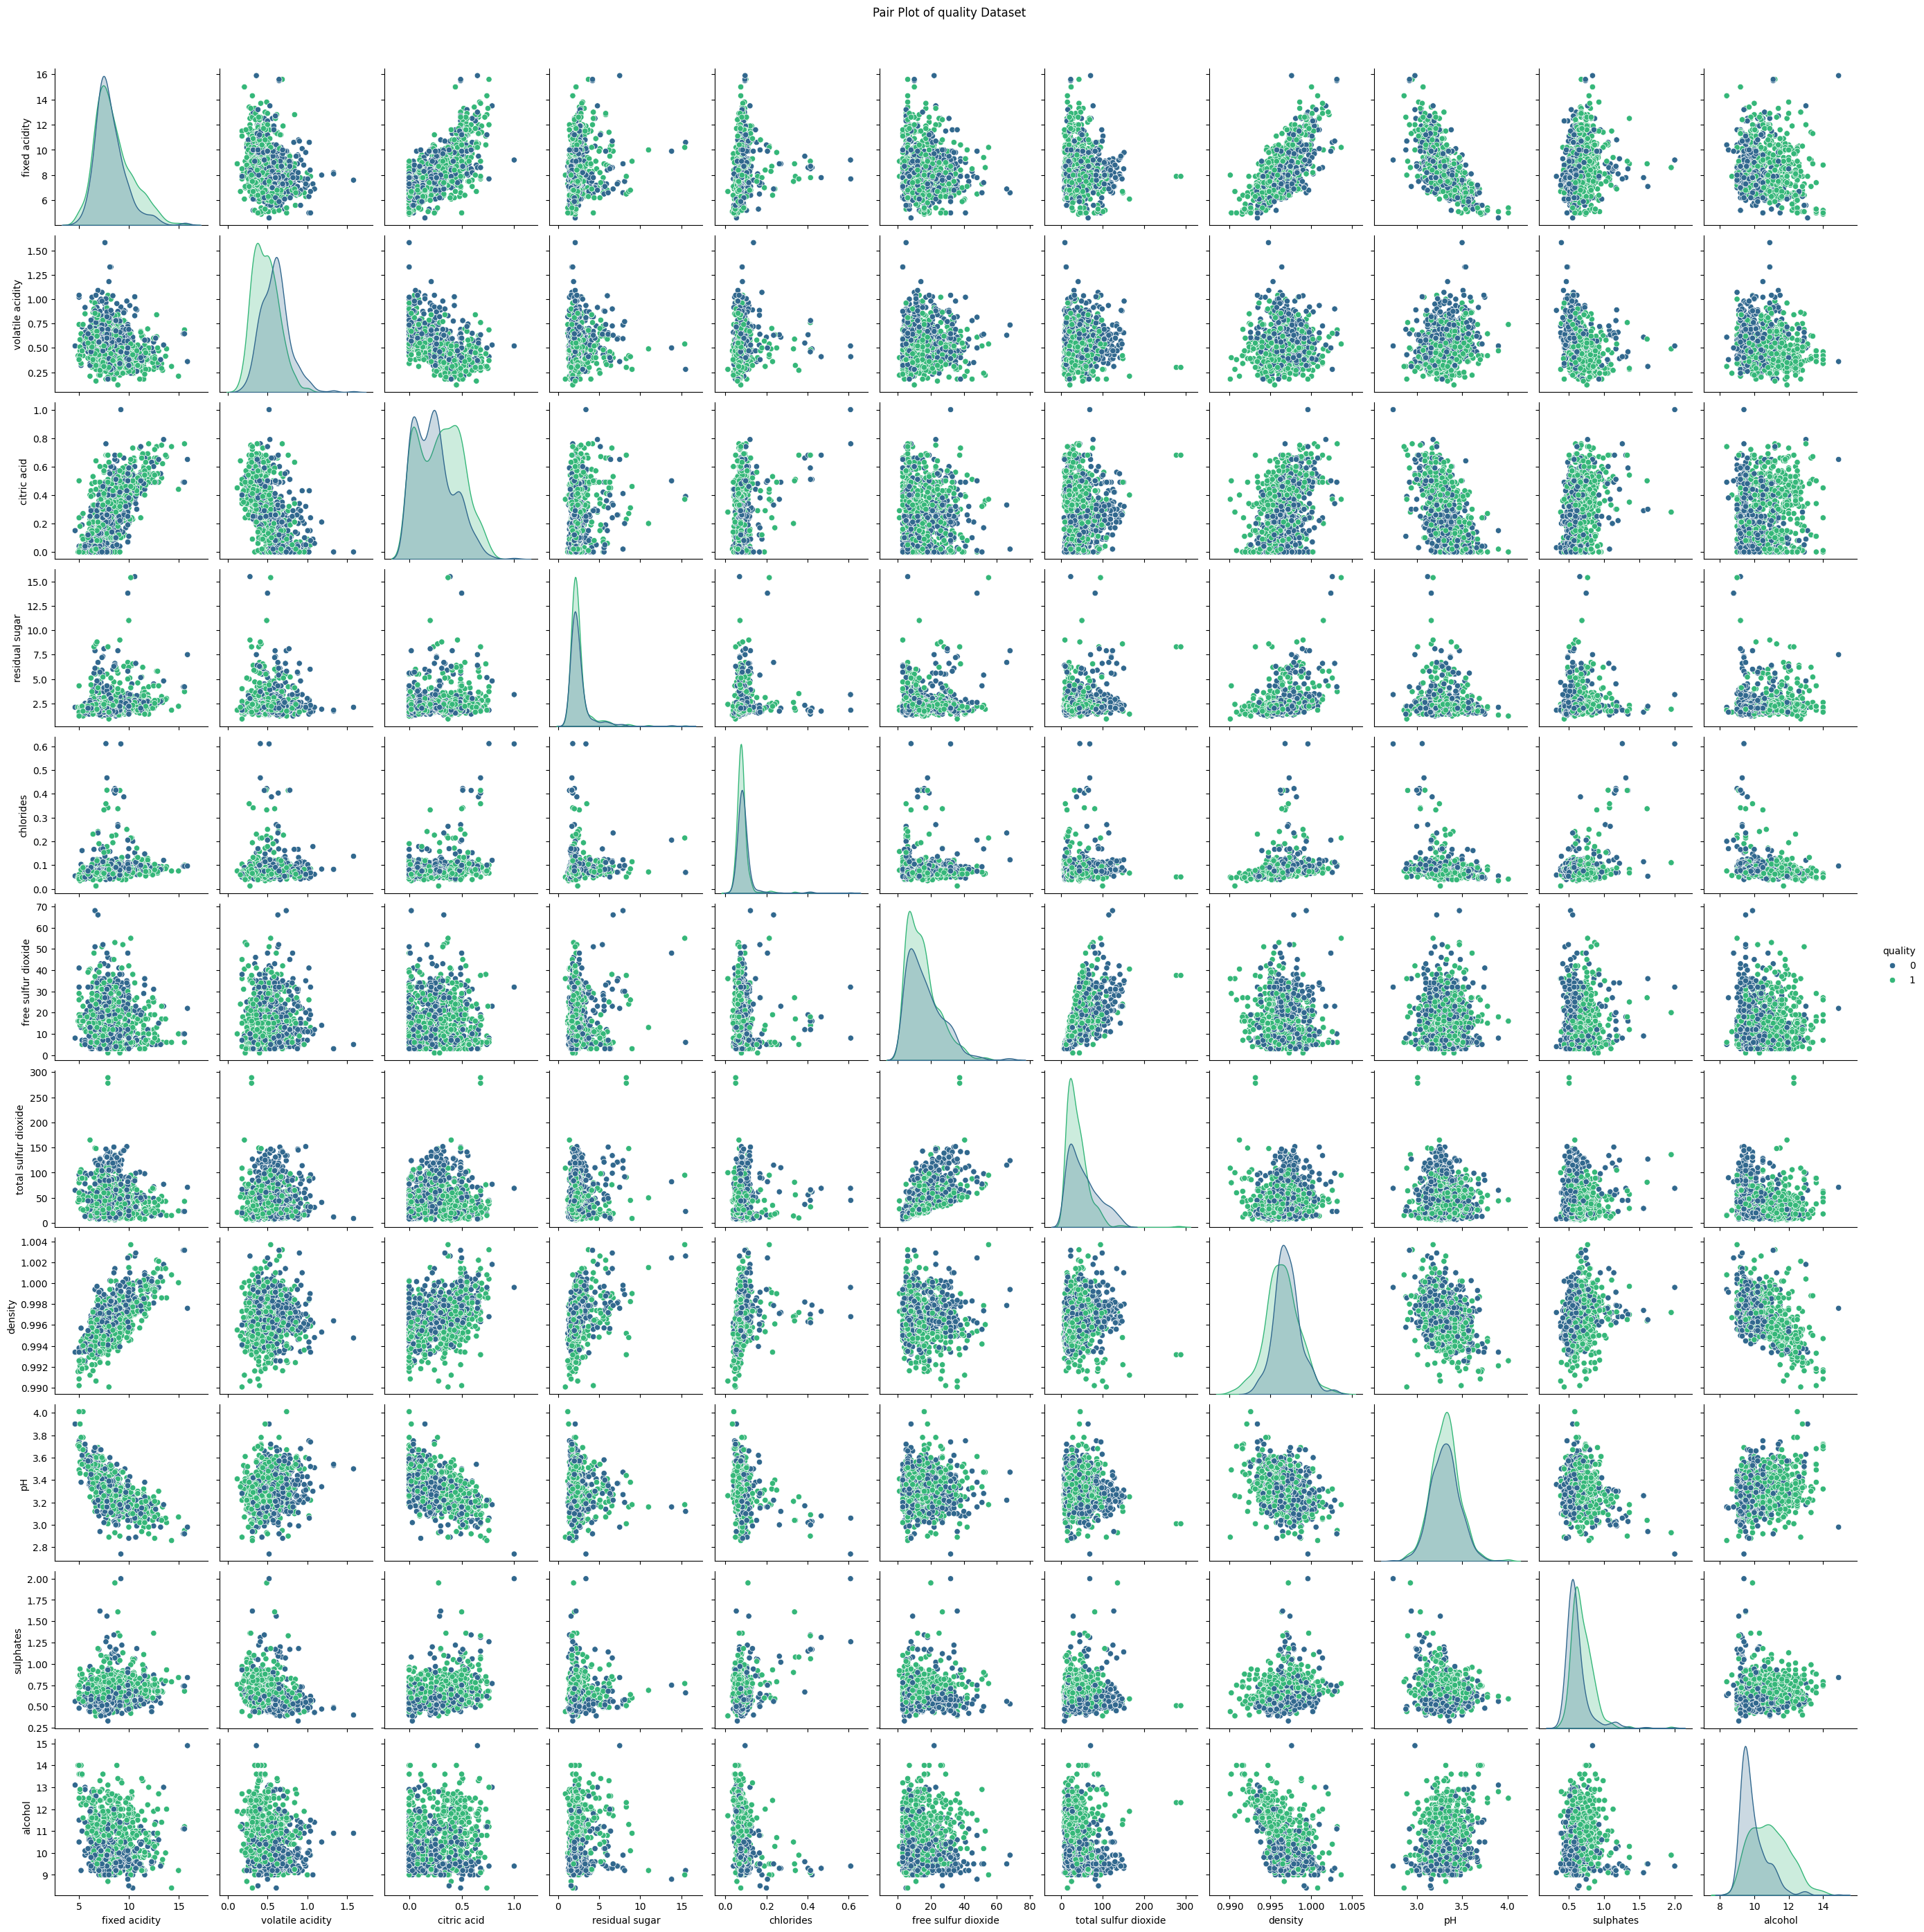

In [28]:
Visualization.pair_plot(df, y)

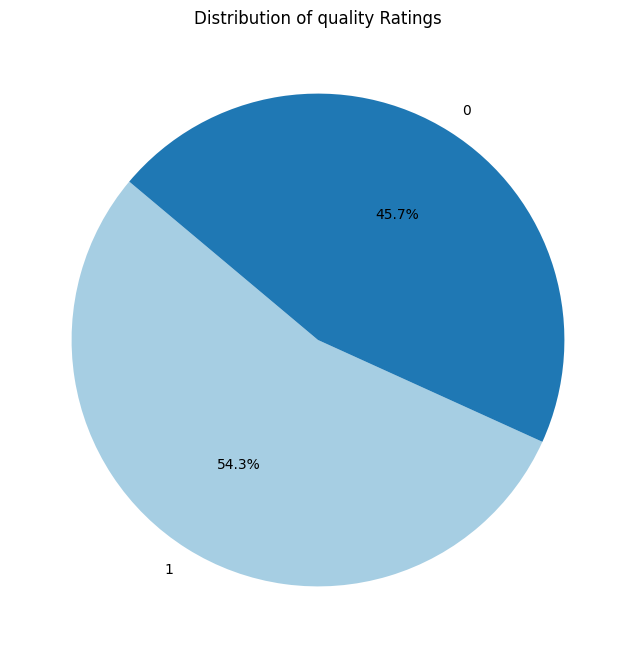

In [29]:
Visualization.target(y)

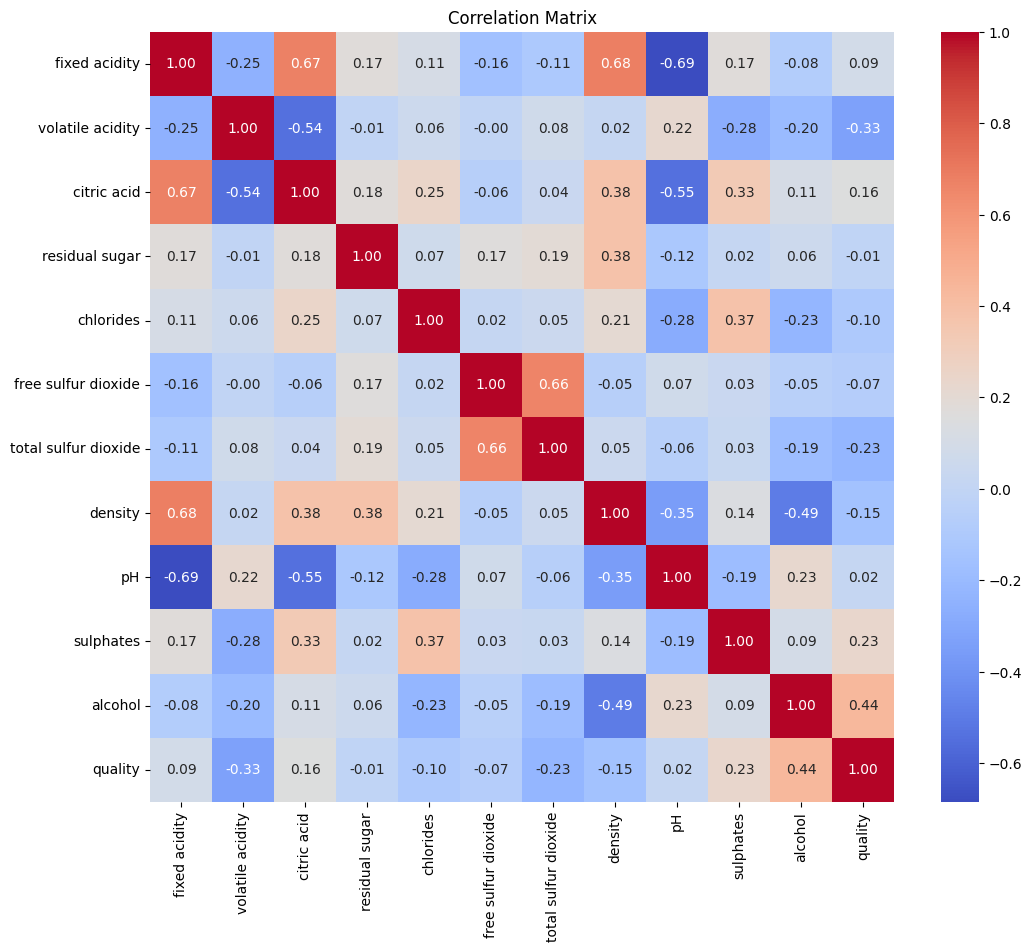

In [30]:
Visualization.correlation_matrix(df)

In [31]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                              
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                          
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality  
Id                      
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1592     11.0        1  
1593      9.5        1  
1594     10.5        0  
1595     11.2        1  
1597     10.2        0  

[1143 rows x 12 columns]

## Logistic regression

In [32]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

results_lr = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler_name == 'none':
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_lr.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_Accuracy': None,
                    'Train_Precision': None,
                    'Train_Recall': None,
                    'Train_F1': None,
                    'Test_Accuracy': None,
                    'Test_Precision': None,
                    'Test_Recall': None,
                    'Test_F1': None
                })
                continue

        lr = LogisticRegression(random_state=42, max_iter=5000)

        try:
            grid_search = GridSearchCV(
                estimator=lr,
                param_grid=param_grid,
                cv=5,
                scoring='f1_macro',
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_lr = grid_search.best_estimator_

            y_pred_test = best_lr.predict(x_test_scaled)
            y_pred_train = best_lr.predict(x_res)

            results_lr.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,

                'Train_Accuracy': accuracy_score(y_res, y_pred_train),
                'Train_Precision': precision_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_Recall': recall_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_F1': f1_score(y_res, y_pred_train, average='macro', zero_division=0),

                'Test_Accuracy': accuracy_score(y_test, y_pred_test),
                'Test_Precision': precision_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_Recall': recall_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_F1': f1_score(y_test, y_pred_test, average='macro', zero_division=0)
            })

        except Exception as e:
            results_lr.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_Accuracy': None,
                'Train_Precision': None,
                'Train_Recall': None,
                'Train_F1': None,
                'Test_Accuracy': None,
                'Test_Precision': None,
                'Test_Recall': None,
                'Test_F1': None
            })

results_df_lr = pd.DataFrame(results_lr)

results_df_lr

Scaler Sampler                                        BestParams  \
0  standard    none  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}   
1  standard     ros       {'C': 1, 'penalty': 'l1', 'solver': 'saga'}   
2  standard   smote     {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}   
3    minmax    none       {'C': 1, 'penalty': 'l1', 'solver': 'saga'}   
4    minmax     ros      {'C': 10, 'penalty': 'l1', 'solver': 'saga'}   
5    minmax   smote     {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}   

   Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  \
0        0.761488         0.759644      0.759840  0.759738       0.777293   
1        0.755533         0.755907      0.755533  0.755444       0.759825   
2        0.748491         0.749400      0.748491  0.748262       0.768559   
3        0.760394         0.758559      0.759027  0.758770       0.772926   
4        0.756539         0.756876      0.756539  0.756459       0.764192   
5        0.755533         0.756082      0.755533  0.755402       0.759825   

   Test_Precision  Test_Recall   Test_F1  
0        0.776089     0.777573  0.776457  
1        0.761338     0.762903  0.759660  
2        0.769149     0.770968  0.768276  
3        0.771560     0.772811  0.771947  
4        0.765224     0.766935  0.763972  
5        0.762424     0.763633  0.759752

## svm

In [33]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  
}

results_svm = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler_name == 'none':
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_svm.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_Accuracy': None,
                    'Train_Precision': None,
                    'Train_Recall': None,
                    'Train_F1': None,
                    'Test_Accuracy': None,
                    'Test_Precision': None,
                    'Test_Recall': None,
                    'Test_F1': None
                })
                continue

        svm = SVC()

        try:
            grid_search = GridSearchCV(
                estimator=svm,
                param_grid=param_grid,
                cv=5,
                scoring='f1_macro',
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_svm = grid_search.best_estimator_

            y_pred_test = best_svm.predict(x_test_scaled)
            y_pred_train = best_svm.predict(x_res)

            results_svm.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,

                'Train_Accuracy': accuracy_score(y_res, y_pred_train),
                'Train_Precision': precision_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_Recall': recall_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_F1': f1_score(y_res, y_pred_train, average='macro', zero_division=0),

                'Test_Accuracy': accuracy_score(y_test, y_pred_test),
                'Test_Precision': precision_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_Recall': recall_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_F1': f1_score(y_test, y_pred_test, average='macro', zero_division=0)
            })

        except Exception as e:
            results_svm.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_Accuracy': None,
                'Train_Precision': None,
                'Train_Recall': None,
                'Train_F1': None,
                'Test_Accuracy': None,
                'Test_Precision': None,
                'Test_Recall': None,
                'Test_F1': None
            })

results_df_svm = pd.DataFrame(results_svm)

results_df_svm

Scaler Sampler                                    BestParams  \
0  standard    none   {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}   
1  standard     ros      {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}   
2  standard   smote      {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}   
3    minmax    none   {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}   
4    minmax     ros  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}   
5    minmax   smote  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}   

   Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  \
0        0.801969         0.800395      0.800730  0.800554       0.786026   
1        0.868209         0.868211      0.868209  0.868209       0.772926   
2        0.878270         0.878529      0.878270  0.878249       0.781659   
3        0.787746         0.786106      0.787073  0.786494       0.768559   
4        0.825956         0.826115      0.825956  0.825934       0.777293   
5        0.836016         0.836868      0.836016  0.835912       0.768559   

   Test_Precision  Test_Recall   Test_F1  
0        0.784893     0.783449  0.784033  
1        0.773802     0.767704  0.769225  
2        0.781197     0.777957  0.779026  
3        0.766950     0.767320  0.767120  
4        0.775808     0.775384  0.775581  
5        0.767000     0.766590  0.766780

## RandomForest

In [35]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2']  
}

results_rf = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler_name == 'none':
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_rf.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_Accuracy': None,
                    'Train_Precision': None,
                    'Train_Recall': None,
                    'Train_F1': None,
                    'Test_Accuracy': None,
                    'Test_Precision': None,
                    'Test_Recall': None,
                    'Test_F1': None
                })
                continue

        rf = RandomForestClassifier(random_state=42)

        try:
            grid_search = GridSearchCV(
                estimator=rf,
                param_grid=param_grid,
                cv=5,
                scoring='f1_macro',
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_rf = grid_search.best_estimator_

            y_pred_test = best_rf.predict(x_test_scaled)
            y_pred_train = best_rf.predict(x_res)

            results_rf.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,

                'Train_Accuracy': accuracy_score(y_res, y_pred_train),
                'Train_Precision': precision_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_Recall': recall_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_F1': f1_score(y_res, y_pred_train, average='macro', zero_division=0),

                'Test_Accuracy': accuracy_score(y_test, y_pred_test),
                'Test_Precision': precision_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_Recall': recall_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_F1': f1_score(y_test, y_pred_test, average='macro', zero_division=0)
            })

        except Exception as e:
            results_rf.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_Accuracy': None,
                'Train_Precision': None,
                'Train_Recall': None,
                'Train_F1': None,
                'Test_Accuracy': None,
                'Test_Precision': None,
                'Test_Recall': None,
                'Test_F1': None
            })

results_df_rf = pd.DataFrame(results_rf)

results_df_rf

Scaler Sampler                                         BestParams  \
0  standard    none  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
1  standard     ros  {'max_depth': None, 'max_features': 'sqrt', 'm...   
2  standard   smote  {'max_depth': None, 'max_features': 'sqrt', 'm...   
3    minmax    none  {'max_depth': 10, 'max_features': 'sqrt', 'min...   
4    minmax     ros  {'max_depth': None, 'max_features': 'sqrt', 'm...   
5    minmax   smote  {'max_depth': None, 'max_features': 'sqrt', 'm...   

   Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  \
0        0.943107         0.943000      0.942282  0.942623       0.794760   
1        0.990946         0.990948      0.990946  0.990946       0.816594   
2        1.000000         1.000000      1.000000  1.000000       0.812227   
3        0.943107         0.943000      0.942282  0.942623       0.790393   
4        1.000000         1.000000      1.000000  1.000000       0.803493   
5        1.000000         1.000000      1.000000  1.000000       0.803493   

   Test_Precision  Test_Recall   Test_F1  
0        0.795779     0.790054  0.791645  
1        0.816783     0.813134  0.814382  
2        0.811977     0.809101  0.810142  
3        0.790847     0.786022  0.787438  
4        0.803825     0.799578  0.800927  
5        0.802571     0.801037  0.801663

## KNeighbors

In [34]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

results_knn = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler_name == 'none':
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_knn.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_Accuracy': None,
                    'Train_Precision': None,
                    'Train_Recall': None,
                    'Train_F1': None,
                    'Test_Accuracy': None,
                    'Test_Precision': None,
                    'Test_Recall': None,
                    'Test_F1': None
                })
                continue

        knn = KNeighborsClassifier()

        try:
            grid_search = GridSearchCV(
                estimator=knn,
                param_grid=param_grid,
                cv=5,
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_knn = grid_search.best_estimator_

            y_pred_test = best_knn.predict(x_test_scaled)
            y_pred_train = best_knn.predict(x_res)

            results_knn.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,

                'Train_Accuracy': accuracy_score(y_res, y_pred_train),
                'Train_Precision': precision_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_Recall': recall_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_F1': f1_score(y_res, y_pred_train, average='macro', zero_division=0),

                'Test_Accuracy': accuracy_score(y_test, y_pred_test),
                'Test_Precision': precision_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_Recall': recall_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_F1': f1_score(y_test, y_pred_test, average='macro', zero_division=0)
            })

        except Exception as e:
            results_knn.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_Accuracy': None,
                'Train_Precision': None,
                'Train_Recall': None,
                'Train_F1': None,
                'Test_Accuracy': None,
                'Test_Precision': None,
                'Test_Recall': None,
                'Test_F1': None
            })

results_df_knn = pd.DataFrame(results_knn)

results_df_knn

Scaler Sampler                                         BestParams  \
0  standard    none  {'metric': 'euclidean', 'n_neighbors': 13, 'we...   
1  standard     ros  {'metric': 'euclidean', 'n_neighbors': 13, 'we...   
2  standard   smote  {'metric': 'euclidean', 'n_neighbors': 7, 'wei...   
3    minmax    none  {'metric': 'euclidean', 'n_neighbors': 11, 'we...   
4    minmax     ros  {'metric': 'euclidean', 'n_neighbors': 15, 'we...   
5    minmax   smote  {'metric': 'euclidean', 'n_neighbors': 9, 'wei...   

   Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  \
0             1.0              1.0           1.0       1.0       0.777293   
1             1.0              1.0           1.0       1.0       0.768559   
2             1.0              1.0           1.0       1.0       0.820961   
3             1.0              1.0           1.0       1.0       0.764192   
4             1.0              1.0           1.0       1.0       0.781659   
5             1.0              1.0           1.0       1.0       0.768559   

   Test_Precision  Test_Recall   Test_F1  
0        0.781295     0.770276  0.772273  
1        0.767215     0.765860  0.766403  
2        0.820853     0.817896  0.818972  
3        0.765773     0.758180  0.759790  
4        0.780321     0.779416  0.779808  
5        0.767597     0.765131  0.765989

## XGBoost

In [36]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5, 6],  
    'min_child_weight': [1, 2, 3],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.2]  
}

results_xgb = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler_name == 'none':
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_xgb.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_Accuracy': None,
                    'Train_Precision': None,
                    'Train_Recall': None,
                    'Train_F1': None,
                    'Test_Accuracy': None,
                    'Test_Precision': None,
                    'Test_Recall': None,
                    'Test_F1': None
                })
                continue

        xgb = xgboost.XGBClassifier(objective='binary:logistic', random_state=42)

        try:
            grid_search = GridSearchCV(
                estimator=xgb,
                param_grid=param_grid,
                cv=5,
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_xgb = grid_search.best_estimator_

            y_pred_test = best_xgb.predict(x_test_scaled)
            y_pred_train = best_xgb.predict(x_res)

            results_xgb.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,

                'Train_Accuracy': accuracy_score(y_res, y_pred_train),
                'Train_Precision': precision_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_Recall': recall_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_F1': f1_score(y_res, y_pred_train, average='macro', zero_division=0),

                'Test_Accuracy': accuracy_score(y_test, y_pred_test),
                'Test_Precision': precision_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_Recall': recall_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_F1': f1_score(y_test, y_pred_test, average='macro', zero_division=0)
            })

        except Exception as e:
            results_xgb.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_Accuracy': None,
                'Train_Precision': None,
                'Train_Recall': None,
                'Train_F1': None,
                'Test_Accuracy': None,
                'Test_Precision': None,
                'Test_Recall': None,
                'Test_F1': None
            })

results_df_xgb = pd.DataFrame(results_xgb)

results_df_xgb

Scaler Sampler                                         BestParams  \
0  standard    none  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learn...   
1  standard     ros  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...   
2  standard   smote  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...   
3    minmax    none  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learn...   
4    minmax     ros  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...   
5    minmax   smote  {'colsample_bytree': 0.6, 'gamma': 0.2, 'learn...   

   Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  \
0        0.984683         0.985709      0.983599  0.984533       0.799127   
1        0.997988         0.997988      0.997988  0.997988       0.807860   
2        0.997988         0.997996      0.997988  0.997988       0.807860   
3        0.984683         0.985709      0.983599  0.984533       0.799127   
4        0.997988         0.997988      0.997988  0.997988       0.807860   
5        1.000000         1.000000      1.000000  1.000000       0.799127   

   Test_Precision  Test_Recall   Test_F1  
0        0.800786     0.794086  0.795853  
1        0.808732     0.803610  0.805152  
2        0.808732     0.803610  0.805152  
3        0.800786     0.794086  0.795853  
4        0.808732     0.803610  0.805152  
5        0.800786     0.794086  0.795853

## LightGBM 

In [39]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
}


results_lgb = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler_name == 'none':
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_lgb.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_Accuracy': None,
                    'Train_Precision': None,
                    'Train_Recall': None,
                    'Train_F1': None,
                    'Test_Accuracy': None,
                    'Test_Precision': None,
                    'Test_Recall': None,
                    'Test_F1': None
                })
                continue

        lgb = LGBMClassifier(objective='binary',metric='binary_logloss',random_state=42)

        try:
            grid_search = GridSearchCV(
                estimator=lgb,
                param_grid=param_grid,
                cv=5,
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_lgb = grid_search.best_estimator_

            y_pred_test = best_lgb.predict(x_test_scaled)
            y_pred_train = best_lgb.predict(x_res)

            results_lgb.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,

                'Train_Accuracy': accuracy_score(y_res, y_pred_train),
                'Train_Precision': precision_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_Recall': recall_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_F1': f1_score(y_res, y_pred_train, average='macro', zero_division=0),

                'Test_Accuracy': accuracy_score(y_test, y_pred_test),
                'Test_Precision': precision_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_Recall': recall_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_F1': f1_score(y_test, y_pred_test, average='macro', zero_division=0)
            })

        except Exception as e:
            results_lgb.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_Accuracy': None,
                'Train_Precision': None,
                'Train_Recall': None,
                'Train_F1': None,
                'Test_Accuracy': None,
                'Test_Precision': None,
                'Test_Recall': None,
                'Test_F1': None
            })

results_df_lgb = pd.DataFrame(results_lgb)

results_df_lgb

[LightGBM] [Info] Number of positive: 497, number of negative: 417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 914, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543764 -> initscore=0.175504
[LightGBM] [Info] Start training from score 0.175504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

Scaler Sampler                                         BestParams  \
0  standard    none  {'learning_rate': 0.05, 'max_depth': 7, 'min_c...   
1  standard     ros  {'learning_rate': 0.05, 'max_depth': 7, 'min_c...   
2  standard   smote  {'learning_rate': 0.05, 'max_depth': 7, 'min_c...   
3    minmax    none  {'learning_rate': 0.05, 'max_depth': 5, 'min_c...   
4    minmax     ros  {'learning_rate': 0.1, 'max_depth': 7, 'min_ch...   
5    minmax   smote  {'learning_rate': 0.1, 'max_depth': 5, 'min_ch...   

   Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  \
0        0.981400         0.981998      0.980581  0.981230       0.807860   
1        0.979879         0.979887      0.979879  0.979879       0.807860   
2        0.985915         0.985923      0.985915  0.985915       0.790393   
3        0.924508         0.924145      0.923635  0.923880       0.812227   
4        1.000000         1.000000      1.000000  1.000000       0.807860   
5        0.972837         0.972992      0.972837  0.972835       0.768559   

   Test_Precision  Test_Recall   Test_F1  
0        0.807887     0.804339  0.805543  
1        0.807240     0.805069  0.805902  
2        0.790093     0.786751  0.787865  
3        0.811977     0.809101  0.810142  
4        0.809780     0.802880  0.804729  
5        0.767000     0.766590  0.766780

## Voting

In [51]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

params_lr = {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
params_svm = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
params_rf = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
params_xgb = {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
params_lgb = {'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 10, 'n_estimators': 100, 'num_leaves': 63, 'subsample': 0.6}

results_voting = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler_name == 'none':
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_voting.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'Error': str(e),
                    'Train_Accuracy': None,
                    'Train_Precision': None,
                    'Train_Recall': None,
                    'Train_F1': None,
                    'Test_Accuracy': None,
                    'Test_Precision': None,
                    'Test_Recall': None,
                    'Test_F1': None
                })
                continue

        model_lr = LogisticRegression(**params_lr, random_state=42, max_iter=5000)
        model_svm = SVC(**params_svm, probability=True, random_state=42)
        model_rf = RandomForestClassifier(**params_rf, random_state=42)
        model_xgb = xgboost.XGBClassifier(**params_xgb, use_label_encoder=False, eval_metric='logloss', random_state=42)
        model_lgb = LGBMClassifier(**params_lgb, random_state=42)

        voting_clf = VotingClassifier(
            estimators=[
                ('lr', model_lr),
                ('svm', model_svm),
                ('rf', model_rf),
                ('xgb', model_xgb),
                ('lgb', model_lgb)
            ],
            voting='soft',
            n_jobs=-1
        )

        try:
            voting_clf.fit(x_res, y_res)

            y_pred_train = voting_clf.predict(x_res)
            y_pred_test = voting_clf.predict(x_test_scaled)

            results_voting.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Error': None,

                'Train_Accuracy': accuracy_score(y_res, y_pred_train),
                'Train_Precision': precision_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_Recall': recall_score(y_res, y_pred_train, average='macro', zero_division=0),
                'Train_F1': f1_score(y_res, y_pred_train, average='macro', zero_division=0),

                'Test_Accuracy': accuracy_score(y_test, y_pred_test),
                'Test_Precision': precision_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_Recall': recall_score(y_test, y_pred_test, average='macro', zero_division=0),
                'Test_F1': f1_score(y_test, y_pred_test, average='macro', zero_division=0)
            })

        except Exception as e:
            results_voting.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Error': str(e),
                'Train_Accuracy': None,
                'Train_Precision': None,
                'Train_Recall': None,
                'Train_F1': None,
                'Test_Accuracy': None,
                'Test_Precision': None,
                'Test_Recall': None,
                'Test_F1': None
            })

results_df_voting = pd.DataFrame(results_voting)
results_df_voting

Scaler Sampler Error  Train_Accuracy  Train_Precision  Train_Recall  \
0  standard    none  None        0.967177         0.966924      0.966924   
1  standard     ros  None        0.969819         0.970009      0.969819   
2  standard   smote  None        0.971831         0.971862      0.971831   
3    minmax    none  None        0.969365         0.969129      0.969129   
4    minmax     ros  None        0.974849         0.975005      0.974849   
5    minmax   smote  None        0.970825         0.970873      0.970825   

   Train_F1  Test_Accuracy  Test_Precision  Test_Recall   Test_F1  
0  0.966924       0.807860        0.807887     0.804339  0.805543  
1  0.969816       0.816594        0.816097     0.813863  0.814725  
2  0.971831       0.820961        0.819846     0.819355  0.819585  
3  0.969129       0.820961        0.821662     0.817166  0.818623  
4  0.974847       0.829694        0.829088     0.827419  0.828108  
5  0.970824       0.816594        0.815323     0.815323  0.815323

## result 

In [5]:
def clf_ccore(y_true, y_pred,data_name):

    print(f'*********{data_name}*********')
    accuracy = accuracy_score(y_true, y_pred,)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    data = {
        'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
         'Score': [accuracy, recall, precision, f1]
    }
    df_clf = pd.DataFrame(data)
    print(df_clf)

In [15]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

svm = SVC(C= 1, gamma= 'scale', kernel= 'rbf')
svm.fit(x_train_st,y_train)
y_pred = svm.predict(x_test_st)
y_pred_train = svm.predict(x_train_st)

clf_ccore(y_test, y_pred, 'test')
clf_ccore(y_train, y_pred_train, 'train')


*********test*********
      Metric     Score
0   Accuracy  0.786026
1     Recall  0.783449
2  Precision  0.784893
3   F1 Score  0.784033
*********train*********
      Metric     Score
0   Accuracy  0.801969
1     Recall  0.800730
2  Precision  0.800395
3   F1 Score  0.800554
